In [15]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [16]:
# re-size all the images to this
IMAGE_SIZE = [224,224]

train_path = 'F:/My Data Science Projects/Deep_Learning_Maleria_Detection/Dataset/Dataset/Train'
valid_path = 'F:/My Data Science Projects/Deep_Learning_Maleria_Detection/Dataset/Dataset/Test'

In [17]:
# Import the Vgg 19 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights
vggmodel = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [18]:
# don't train existing weights
for layer in vggmodel.layers:
    layer.trainable = False

In [19]:
# useful for getting number of output classes
folders = glob('F:/My Data Science Projects/Deep_Learning_Maleria_Detection/Dataset/Dataset/Train/*')

In [20]:
# our layers - you can add more if you want
x = Flatten()(vggmodel.output)

In [21]:
prediction = Dense(len(folders),activation='softmax')(x)

# create a model object
model = Model(inputs=vggmodel.input, outputs=prediction)

In [22]:
# view the structure of the model
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [23]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [24]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [25]:
# Make sure you provide the same target size as initialied for the image size

training_set = train_datagen.flow_from_directory('F:/My Data Science Projects/Deep_Learning_Maleria_Detection/Dataset/Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [26]:
test_set = test_datagen.flow_from_directory('F:/My Data Science Projects/Deep_Learning_Maleria_Detection/Dataset/Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [27]:
from PIL import Image

In [28]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
13/13 [==============================] - 594s 46s/step - loss: 1.7612 - accuracy: 0.5096 - val_loss: 0.6595 - val_accuracy: 0.6866
Epoch 2/10
13/13 [==============================] - 569s 44s/step - loss: 0.8903 - accuracy: 0.6298 - val_loss: 0.5054 - val_accuracy: 0.7164
Epoch 3/10
13/13 [==============================] - 567s 44s/step - loss: 0.4413 - accuracy: 0.8029 - val_loss: 0.5850 - val_accuracy: 0.7090
Epoch 4/10
13/13 [==============================] - 571s 44s/step - loss: 0.3794 - accuracy: 0.8173 - val_loss: 0.4673 - val_accuracy: 0.7164
Epoch 5/10
13/13 [==============================] - 572s 44s/step - loss: 0.3502 - accuracy: 0.8486 - val_loss: 0.4924 - val_accuracy: 0.7761
Epoch 6/10
13/13 [==============================] - 571s 44s/step - loss: 0.2907 - accuracy: 0.9062 - val_loss: 0.3620 - val_accuracy: 0.8507
Epoch 7/10
13/13 [==============================] - 579s 45s/step - loss: 0.2917 - accuracy: 0.8798 - val_loss: 0.3742 - val_accuracy: 0.8433
Epoch 

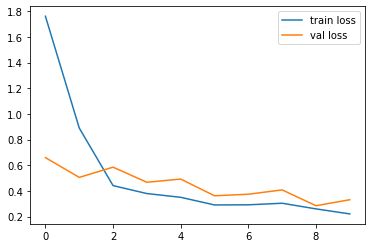

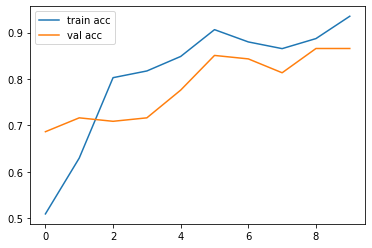

<Figure size 432x288 with 0 Axes>

In [29]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [30]:
# save it as a h5 file

from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [31]:
y_pred = model.predict(test_set)


In [32]:
y_pred

array([[1.80785224e-01, 8.19214821e-01],
       [5.17628253e-01, 4.82371777e-01],
       [9.85819936e-01, 1.41800828e-02],
       [1.67214870e-01, 8.32785130e-01],
       [1.02825105e-01, 8.97174954e-01],
       [2.44184673e-01, 7.55815387e-01],
       [9.46604013e-01, 5.33960015e-02],
       [1.38218880e-01, 8.61781180e-01],
       [9.98460293e-01, 1.53976504e-03],
       [9.85941231e-01, 1.40587818e-02],
       [8.51820052e-01, 1.48179948e-01],
       [6.32056415e-01, 3.67943555e-01],
       [9.75219846e-01, 2.47802027e-02],
       [9.82277989e-01, 1.77220423e-02],
       [7.68994570e-01, 2.31005430e-01],
       [8.99223685e-01, 1.00776315e-01],
       [1.41141757e-01, 8.58858287e-01],
       [5.22056460e-01, 4.77943540e-01],
       [6.01387441e-01, 3.98612589e-01],
       [7.29418933e-01, 2.70581067e-01],
       [2.49013171e-01, 7.50986874e-01],
       [6.52894497e-01, 3.47105533e-01],
       [2.56551623e-01, 7.43448436e-01],
       [1.51897207e-01, 8.48102808e-01],
       [3.156282

In [33]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [34]:
y_pred

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0], dtype=int64)

In [35]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [36]:
model=load_model('model_vgg19.h5')

In [46]:
img=image.load_img('F:/My Data Science Projects/Deep_Learning_Maleria_Detection/Dataset/Dataset/Test/Uninfected/2.png',target_size=(224,224))

In [47]:
x=image.img_to_array(img)
x


array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [48]:
x.shape

(224, 224, 3)

In [49]:
x=x/255

In [50]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [51]:
model.predict(img_data)

array([[4.8637035e-04, 9.9951363e-01]], dtype=float32)

In [52]:
a=np.argmax(model.predict(img_data), axis=1)

In [53]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Uninfected
